# Importing Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('F:/Corona_virus_analyst_project/covid_19_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


# Null value Treatment

In [4]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

<Axes: >

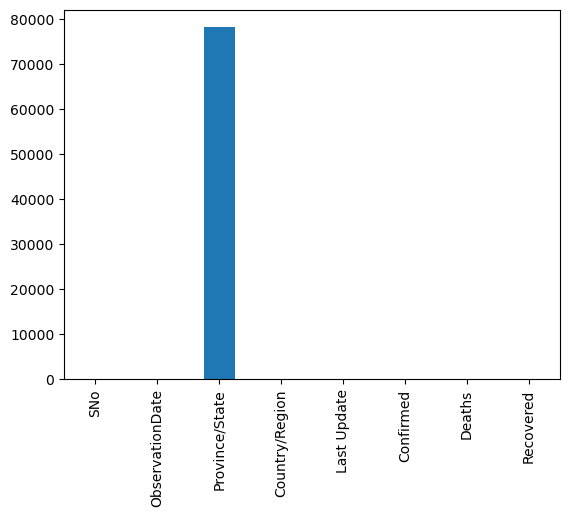

In [5]:
df.isna().sum().plot(kind='bar') #missing values by visualising

In [6]:
#One columns has the most null values
#Province/State columns has the most highest null values

<Axes: >

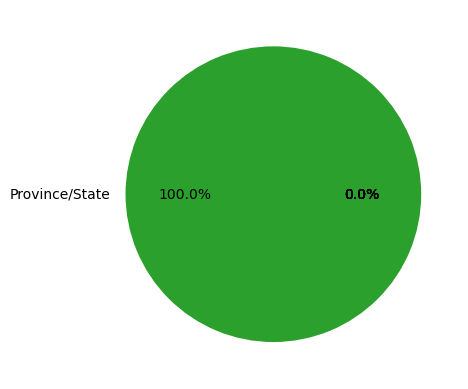

In [7]:
df.isna().sum().plot(kind='pie',autopct='%1.1f%%') #missing values by visualising

In [8]:
#Province/State columns has 100% null values

In [9]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])  #categorical columns filled by mode
    else:
        df[i]=df[i].fillna(df[i].mean())     #numerical columns filled by mean

In [10]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

# Descriptive Statistics

In [11]:
for i in df.columns:
    if df[i].dtypes!=object:
        print(i)
        print()
        print(df[i].describe())
        print('************************************************************************')

SNo

count    306429.000000
mean     153215.000000
std       88458.577156
min           1.000000
25%       76608.000000
50%      153215.000000
75%      229822.000000
max      306429.000000
Name: SNo, dtype: float64
************************************************************************
Confirmed

count    3.064290e+05
mean     8.567091e+04
std      2.775516e+05
min     -3.028440e+05
25%      1.042000e+03
50%      1.037500e+04
75%      5.075200e+04
max      5.863138e+06
Name: Confirmed, dtype: float64
************************************************************************
Deaths

count    306429.000000
mean       2036.403268
std        6410.938048
min        -178.000000
25%          13.000000
50%         192.000000
75%        1322.000000
max      112385.000000
Name: Deaths, dtype: float64
************************************************************************
Recovered

count    3.064290e+05
mean     5.042029e+04
std      2.015124e+05
min     -8.544050e+05
25%      1.100000e+01
50%  

In [12]:
import seaborn as sns
import matplotlib as plt

SNo


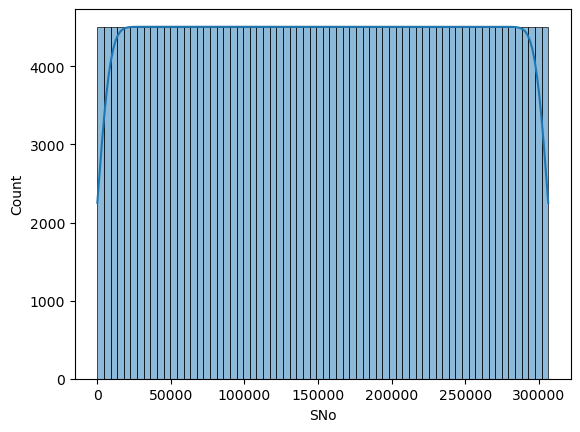

Confirmed


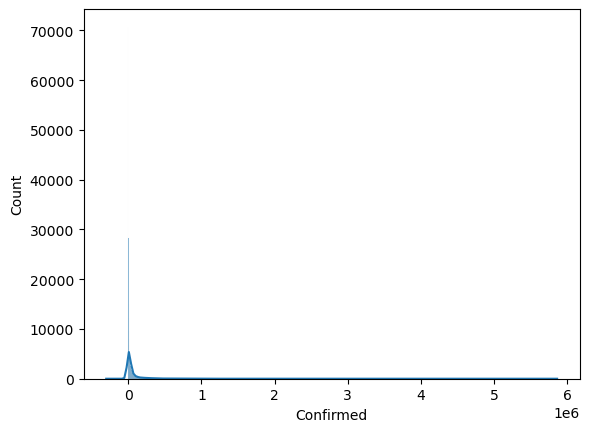

Deaths


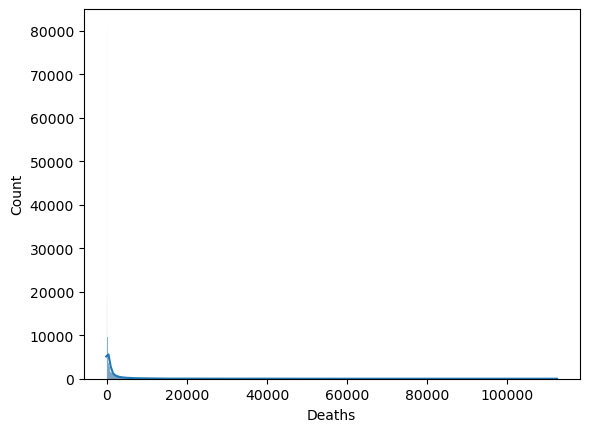

Recovered


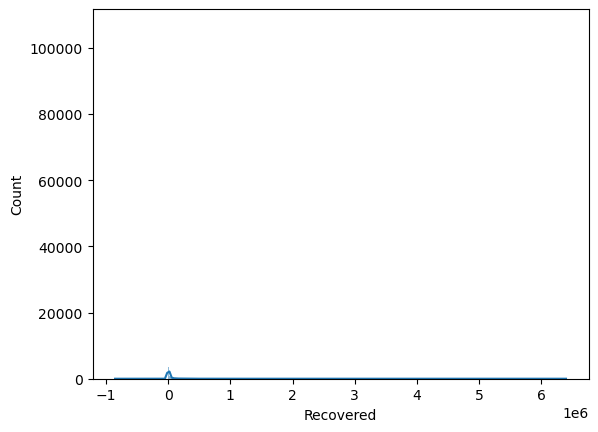

In [13]:
from matplotlib.pyplot import show
for i in df.columns:
    if df[i].dtypes!=object:
        sns.histplot(data=df,x=i,kde=True)
        print(i)
        show()

# Geographical Analysis:

In [14]:
df['Country/Region'].value_counts()

Country/Region
Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: count, Length: 229, dtype: int64

<Axes: xlabel='Country/Region'>

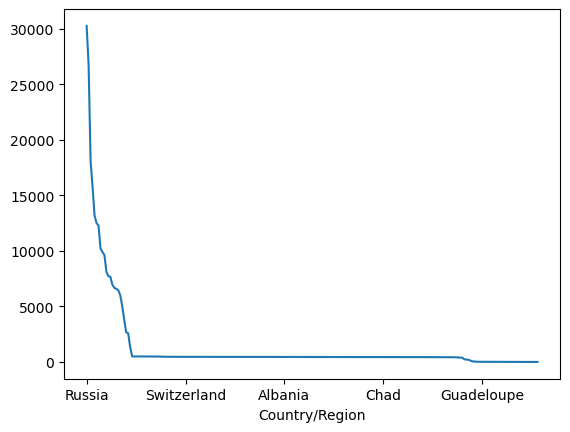

In [15]:
df['Country/Region'].value_counts().plot(kind='line')

In [16]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [17]:
cat

['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']

In [18]:
con

['SNo', 'Confirmed', 'Deaths', 'Recovered']

# Correlation

In [19]:
Xcat=df[cat]
Xcon=df[con]

In [20]:
Xcon.corr() #correlation between all numerical columns

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.237319,0.197038,0.190511
Confirmed,0.237319,1.000000,0.888416,0.633479
Deaths,0.197038,0.888416,1.000000,0.538416
Recovered,0.190511,0.633479,0.538416,1.000000


<Axes: >

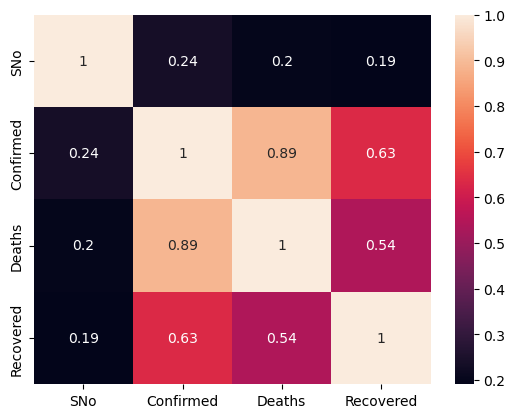

In [21]:
sns.heatmap(Xcon.corr(),annot=True)

<Axes: >

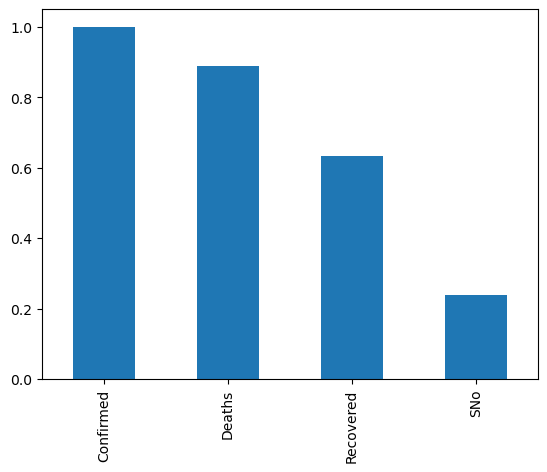

In [22]:
Xcon.corr()['Confirmed'].sort_values(ascending=False).plot(kind='bar')

# PAIRPLOT

C:\Users\addiction computers\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


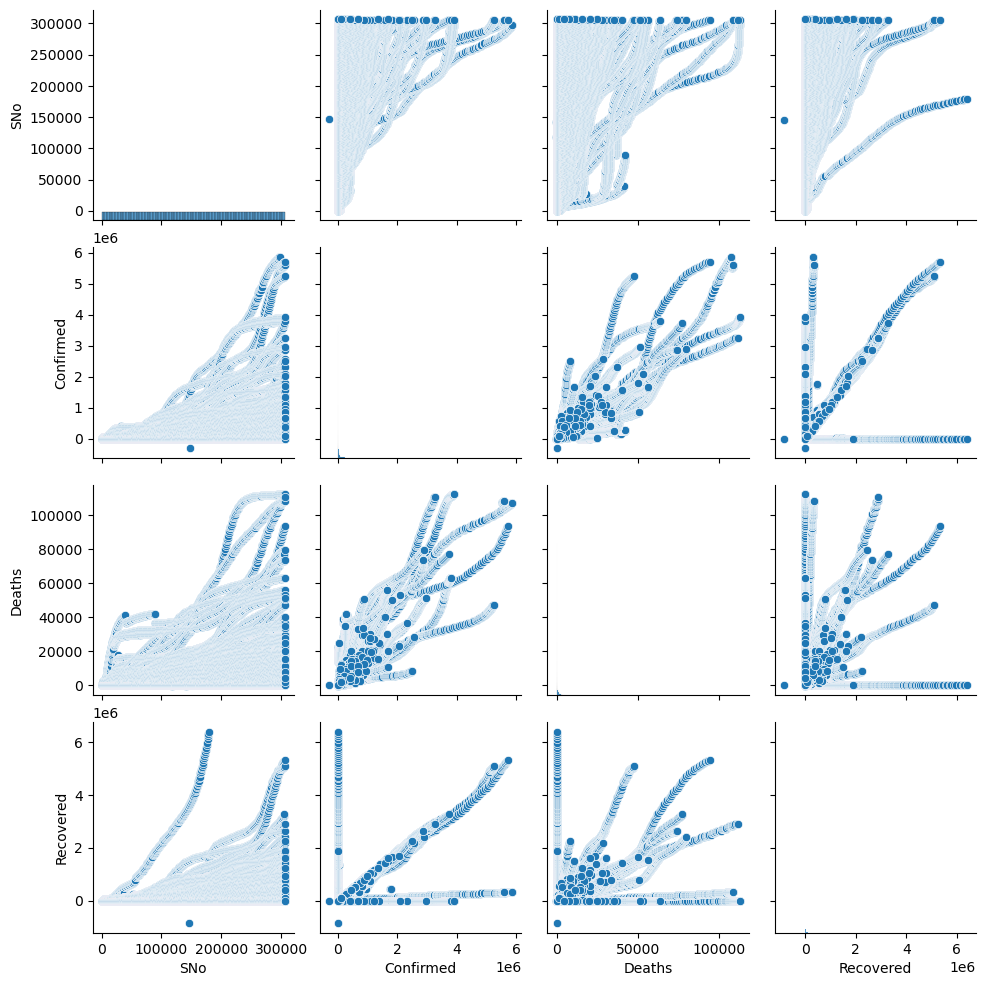

In [23]:
sns.pairplot(data=Xcon)

# ADVANCE ANALYSIS

1.What is the total number of confirmed cases 
worldwide

In [24]:
df['Confirmed'].sum()

26252051758.0

2.How many deaths have been reported globally?

In [25]:
df['Confirmed'].sum()

26252051758.0

3.What is the total number of recovered cases 
worldwide

In [26]:
df['Recovered'].sum()

15450237912.0

4.How many countries/regions are represented in the 
dataset?

In [27]:
df['Country/Region'].nunique()

229

5.What is the trend of confirmed cases over time 
globally?

In [28]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
confirmed_by_date = df.groupby('ObservationDate')['Confirmed'].sum()
confirmed_by_date

ObservationDate
2020-01-22          557.0
2020-01-23         1097.0
2020-01-24          941.0
2020-01-25         1437.0
2020-01-26         2118.0
                 ...     
2021-05-25    167848207.0
2021-05-26    168416423.0
2021-05-27    168970791.0
2021-05-28    169470725.0
2021-05-29    169951560.0
Name: Confirmed, Length: 494, dtype: float64

6.Which province/state has reported the highest 
number of confirmed cases

In [29]:
df.groupby('Province/State')['Confirmed'].max().sort_values(ascending=False).head(1)

Province/State
Unknown    5863138.0
Name: Confirmed, dtype: float64

7.Which country/region has the highest number of 
deaths?

In [30]:
df.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(1)

Country/Region
UK    112385.0
Name: Deaths, dtype: float64

8.How does the number of confirmed cases vary across 
different provinces/states?

In [31]:
df.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False)

Province/State
Unknown                  7.944957e+09
California               6.968980e+08
Maharashtra              6.811869e+08
England                  6.662275e+08
Texas                    5.520399e+08
                             ...     
American Samoa           0.000000e+00
Jervis Bay Territory     0.000000e+00
Recovered                0.000000e+00
Montgomery County, TX    0.000000e+00
External territories     0.000000e+00
Name: Confirmed, Length: 736, dtype: float64

9.What is the trend of deaths over time globally?

In [32]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
confirmed_by_date = df.groupby('ObservationDate')['Deaths'].sum()
confirmed_by_date

ObservationDate
2020-01-22         17.0
2020-01-23         34.0
2020-01-24         26.0
2020-01-25         42.0
2020-01-26         56.0
                ...    
2021-05-25    3485788.0
2021-05-26    3498544.0
2021-05-27    3511297.0
2021-05-28    3523117.0
2021-05-29    3533619.0
Name: Deaths, Length: 494, dtype: float64

10.Which country/region has the highest number of 
recovered cases?

In [33]:
df.groupby('Country/Region')['Recovered'].max().sort_values(ascending=False).head(1)

Country/Region
US    6399531.0
Name: Recovered, dtype: float64

11.How does the number of recovered cases vary 
across different countries/regions?

In [34]:
df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(1)

Country/Region
India    2.900590e+09
Name: Recovered, dtype: float64

12.What is the distribution of confirmed cases by 
country/region? 

In [35]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(1)

Country/Region
US    6.049146e+09
Name: Confirmed, dtype: float64

13.Is there a correlation between the number of 
confirmed cases and deaths?

In [36]:
correlation = df['Confirmed'].corr(df['Deaths'])

print("Correlation coefficient between confirmed cases and deaths:", correlation)

Correlation coefficient between confirmed cases and deaths: 0.8884159872096574


14.Is there a correlation between the number of 
confirmed cases and recovered cases?

In [37]:
correlation = df['Confirmed'].corr(df['Recovered'])

print("Correlation coefficient between confirmed cases and recovered cases:", correlation)

Correlation coefficient between confirmed cases and recovered cases: 0.6334793001462246


15.How does the mortality rate vary across different 
countries/regions?

In [39]:
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100
mortality_by_country = df.groupby('Country/Region')['Mortality Rate'].mean().sort_values(ascending=False)
print(mortality_by_country)

Country/Region
Yemen         24.647740
MS Zaandam    22.014538
Belgium       12.647099
Mexico        10.699526
Hungary        6.200539
                ...    
Chile               NaN
China               NaN
Colombia            NaN
Sudan               NaN
UK                  NaN
Name: Mortality Rate, Length: 229, dtype: float64


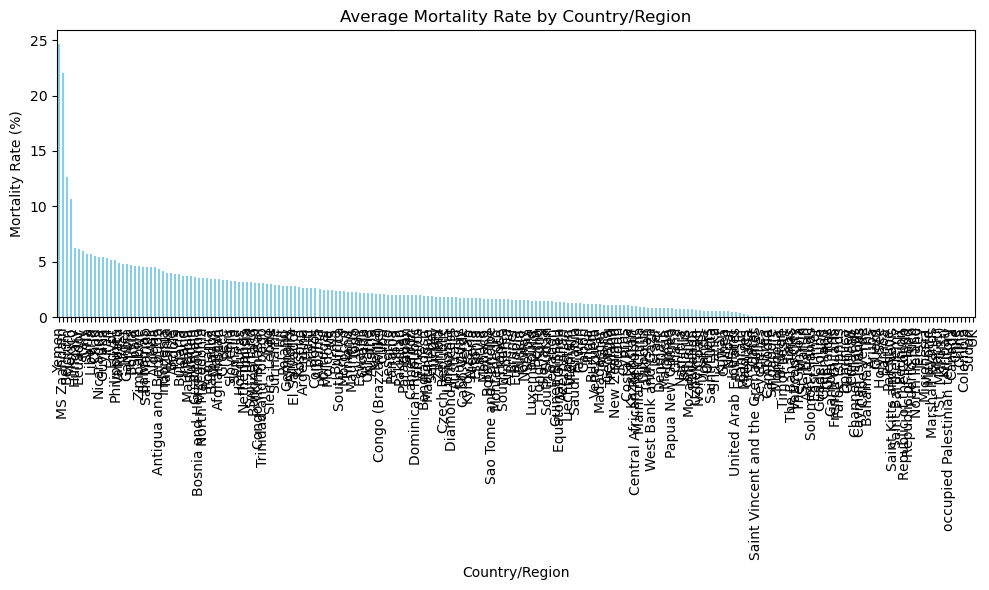

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mortality_by_country.plot(kind='bar', color='skyblue')
plt.title('Average Mortality Rate by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


16.How does the recovery rate vary across different 
countries/regions?

In [41]:
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100
recovery_by_country = df.groupby('Country/Region')['Recovery Rate'].mean().sort_values(ascending=False)
print(recovery_by_country)

Country/Region
Diamond Princess    94.039209
Micronesia          93.798450
Brunei              89.970330
Macau               87.858444
Denmark             87.619277
                      ...    
Mainland China            NaN
Mexico                    NaN
Peru                      NaN
Spain                     NaN
US                        NaN
Name: Recovery Rate, Length: 229, dtype: float64


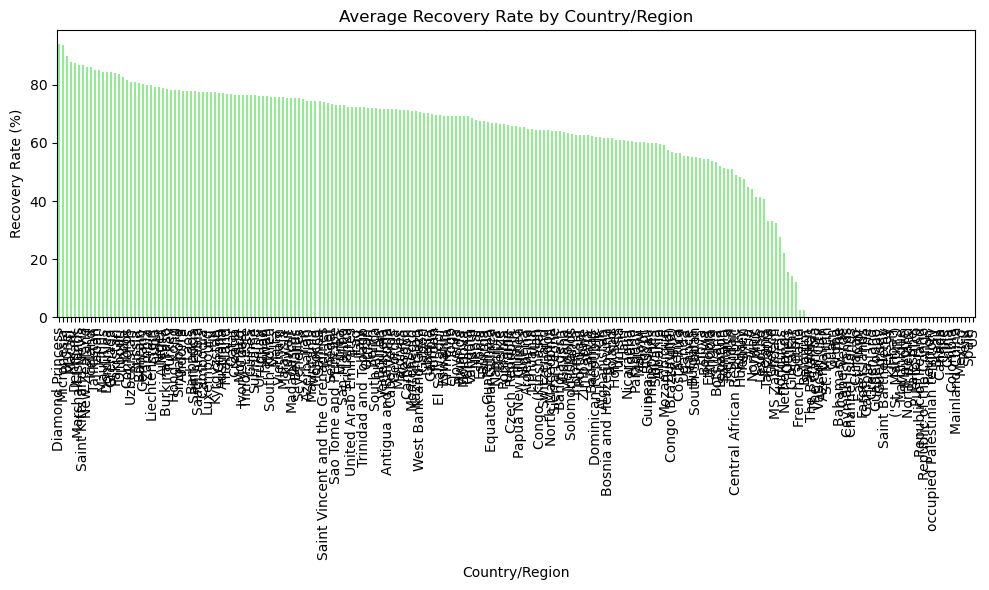

In [43]:
plt.figure(figsize=(10, 6))
recovery_by_country.plot(kind='bar', color='lightgreen')
plt.title('Average Recovery Rate by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


17.What is the trend of new confirmed cases over time globally?

In [44]:
# Step 1: Convert 'ObservationDate' to datetime data type
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Step 2: Group the data by 'ObservationDate' and calculate the total number of confirmed cases for each date
daily_confirmed_cases = df.groupby('ObservationDate')['Confirmed'].sum()
print(daily_confirmed_cases)

ObservationDate
2020-01-22          557.0
2020-01-23         1097.0
2020-01-24          941.0
2020-01-25         1437.0
2020-01-26         2118.0
                 ...     
2021-05-25    167848207.0
2021-05-26    168416423.0
2021-05-27    168970791.0
2021-05-28    169470725.0
2021-05-29    169951560.0
Name: Confirmed, Length: 494, dtype: float64


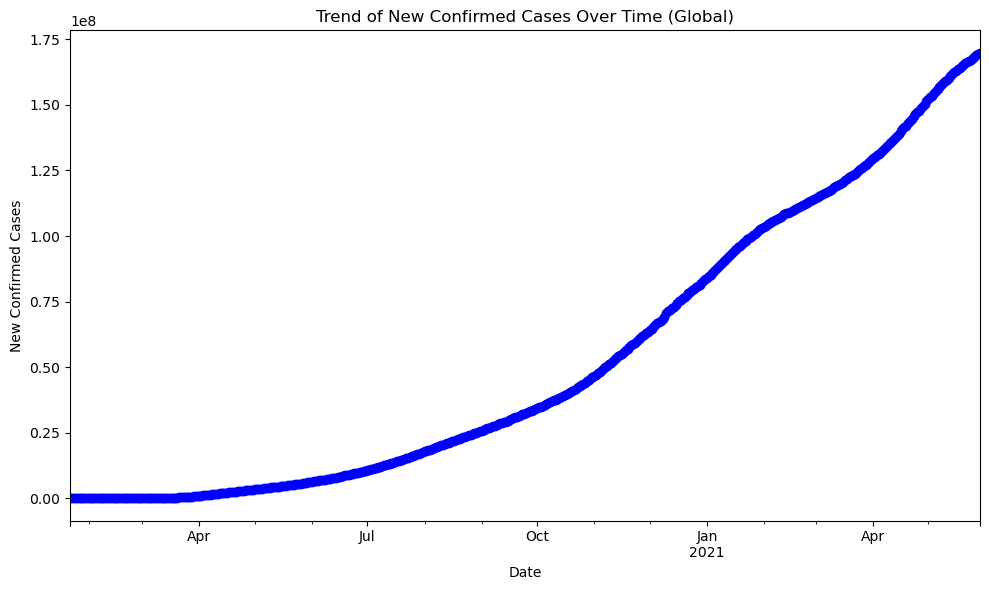

In [47]:
# Step 3: Plot the trend of new confirmed cases over time
plt.figure(figsize=(10, 6))
daily_confirmed_cases.plot(color='blue', marker='o', linestyle='-')
plt.title('Trend of New Confirmed Cases Over Time (Global)')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.grid(False)
plt.tight_layout()
plt.show()


18.How does the fatality rate vary across different provinces/states?

In [48]:
# Step 1: Calculate the fatality rate for each province/state
df['Fatality Rate'] = (df['Deaths'] / df['Confirmed']) * 100

# Step 2: Group the data by 'Province/State' and calculate the mean fatality rate for each
fatality_by_province = df.groupby('Province/State')['Fatality Rate'].mean().sort_values(ascending=False)
print(fatality_by_province)

Province/State
Santa Rosa County, FL    40.000000
Lee County, FL           33.333333
King County, WA          24.463261
Placer County, CA        21.785714
Grant County, WA         20.000000
                           ...    
External territories           NaN
Jervis Bay Territory           NaN
Montgomery County, TX          NaN
Recovered                      NaN
Unknown                        NaN
Name: Fatality Rate, Length: 736, dtype: float64


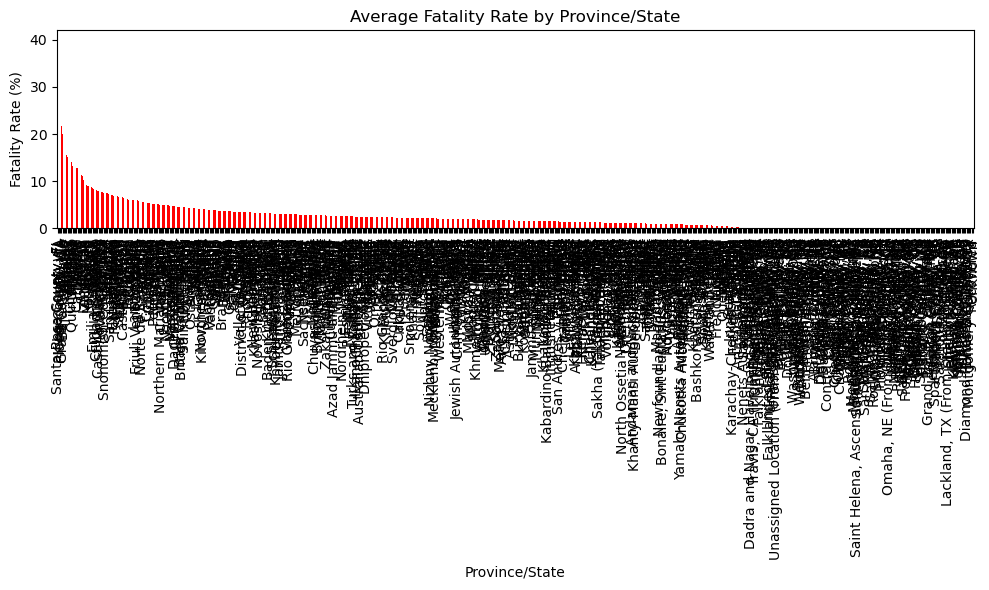

In [49]:
# Step 3: Visualize the fatality rate distribution across different provinces/states
plt.figure(figsize=(10, 6))
fatality_by_province.plot(kind='bar', color='red')
plt.title('Average Fatality Rate by Province/State')
plt.xlabel('Province/State')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


19.How does the recovery rate vary across different provinces/states?

In [51]:
# Step 1: Calculate the recovery rate for each province/state
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Step 2: Group the data by 'Province/State' and calculate the mean recovery rate for each
recovery_by_province = df.groupby('Province/State')['Recovery Rate'].mean().sort_values(ascending=False)
print(recovery_by_province)


Province/State
US                                              13300.000000
Repatriated Travellers                            100.000000
Saint Helena, Ascension and Tristan da Cunha       97.767296
Tibet                                              97.325103
Qinghai                                            96.087084
                                                    ...     
External territories                                     NaN
Jervis Bay Territory                                     NaN
Montgomery County, TX                                    NaN
Recovered                                                NaN
Unknown                                                  NaN
Name: Recovery Rate, Length: 736, dtype: float64


20.What is the trend of active cases over time globally?

In [54]:
# Step 1: Calculate active cases for each observation date
df['Active Cases'] = df['Confirmed'] - df['Recovered'] - df['Deaths']

# Step 2: Group the data by 'ObservationDate' and calculate the total active cases for each date
active_cases_by_date = df.groupby('ObservationDate')['Active Cases'].sum()

print(active_cases_by_date)

ObservationDate
2020-01-22         510.0
2020-01-23        1003.0
2020-01-24         876.0
2020-01-25        1353.0
2020-01-26        2006.0
                 ...    
2021-05-25    59537484.0
2021-05-26    59537131.0
2021-05-27    59381388.0
2021-05-28    59314539.0
2021-05-29    59277272.0
Name: Active Cases, Length: 494, dtype: float64


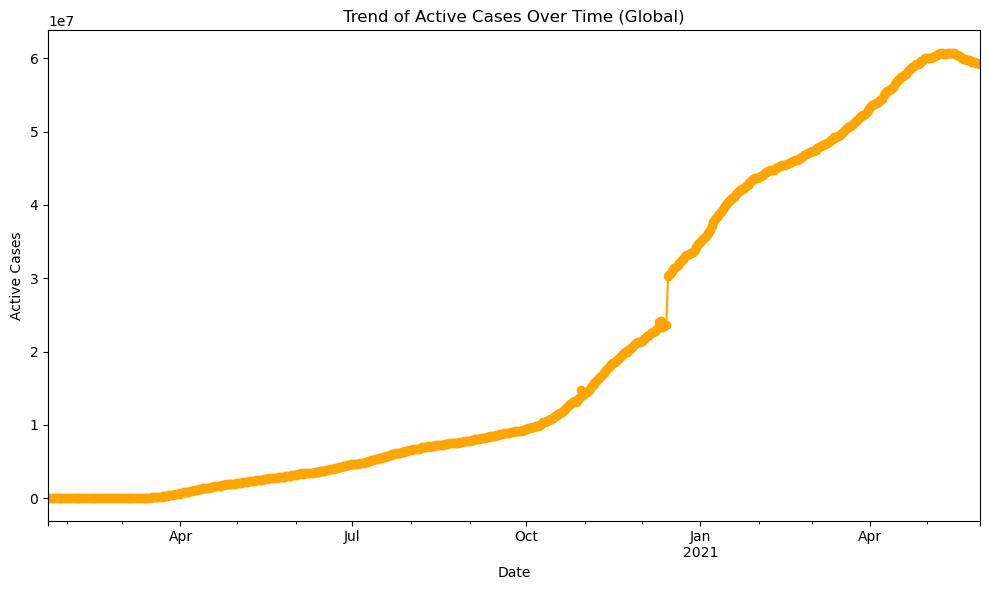

In [56]:
# Plot the trend of active cases over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
active_cases_by_date.plot(color='orange', marker='o', linestyle='-')
plt.title('Trend of Active Cases Over Time (Global)')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.grid(False)
plt.tight_layout()
plt.show()
